In [256]:
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

/home/pranjul/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/pranjul/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [142]:
import base64
import pickle
import pandas as pd


# Load the DataFrame from the CSV file
loaded_df_csv = pd.read_csv('/raid/pranjul/agg_hg_dg2_37_subs_c.csv')

# Define a function to deserialize the 2D arrays
def deserialize_array(serialized_arr):
    return pickle.loads(base64.b64decode(serialized_arr.encode('utf-8')))

# Apply the deserialization function to the column
loaded_df_csv['hg'] = loaded_df_csv['hg'].apply(deserialize_array)

# Apply the deserialization function to the column
loaded_df_csv['dg2'] = loaded_df_csv['dg2'].apply(deserialize_array)

# Now, loaded_df contains the original DataFrame with 2D arrays in 'Array_Column'

In [143]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  
0    [[-19.93076364288096, -19.93076364288096, -19....  
1    [[-20.211703296648277, -20.211703296648277, -2...  
2    [[-18.991512885103706, -18.991512885103706, -1...  
3    [[-19.15343600035568, -19.15343600035568, -19....  
4    [[-19.59324811656509, -19.59324811656509, -19....  
..                                                 ...  
251  [[-19.05009217447225, -19.05009217447225, -19....  
252  [[-19.205521516950164, -19.205521516950164, -1...  
253  [[-19.59326130069748, -19.59326130069748, -19....  
254  [[-18.886515709315667, -18.886515709315667, -1...  
255  [[-19.379196388317176, -19.379196388317176, -1...  

[256 rows x 4 columns]

TypeError: Image data of dtype object cannot be converted to float

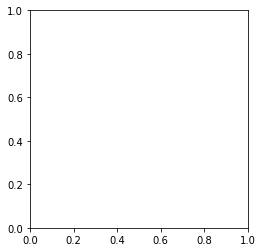

In [10]:
plt.imshow(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['hg'])

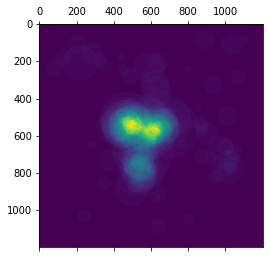

In [18]:
plt.matshow(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['hg'].to_numpy()[0])

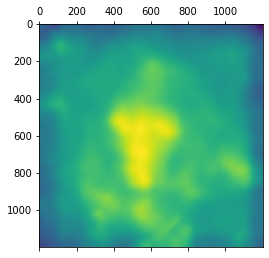

In [20]:
plt.matshow(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['dg2'].to_numpy()[0])

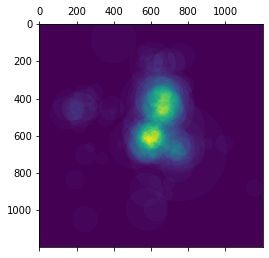

In [21]:
plt.matshow(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['hg'].to_numpy()[0])

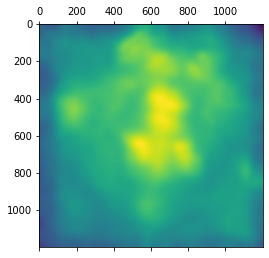

In [22]:
plt.matshow(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['dg2'].to_numpy()[0])

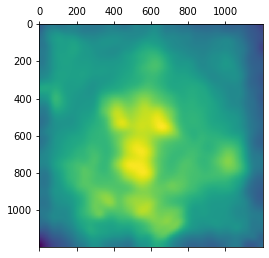

In [34]:
def rotate_180(matrix):
    return [row[::-1] for row in matrix[::-1]]

rotated_matrix_dg2 = rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['dg2'].to_numpy()[0])
rotated_matrix_hg = rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['hg'].to_numpy()[0])

plt.matshow(rotated_matrix_dg2)


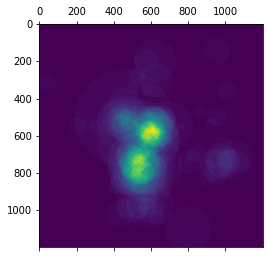

In [35]:
plt.matshow(rotated_matrix_hg)

In [218]:
####
#dg2_face_and_face_inv

spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['dg2'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['dg2'].to_numpy()[0].flatten())[0]


sp_corr_dg2_face_and_face_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_dg2_face_and_face_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['dg2']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['dg2']).flatten())[0])
    
    #break


print('1. sp_corr_dg2_face_and_face_inv: ', np.mean(sp_corr_dg2_face_and_face_inv))

####
#dg2_face_and_face_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['dg2'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['dg2'].to_numpy()[0])).flatten())[0])



sp_corr_dg2_face_and_face_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_dg2_face_and_face_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['dg2']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break

print('2. sp_corr_dg2_face_and_face_inv_inv: ', np.mean(sp_corr_dg2_face_and_face_inv_inv))



####
#hg_face_and_face_inv

spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['hg'].to_numpy()[0].flatten())[0]


sp_corr_hg_face_and_face_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_hg_face_and_face_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['hg']).flatten())[0])
    
    #break


print('3. sp_corr_hg_face_and_face_inv: ', np.mean(sp_corr_hg_face_and_face_inv))



####
#hg_face_and_face_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['hg'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['hg'].to_numpy()[0])).flatten())[0])


sp_corr_hg_face_and_face_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_hg_face_and_face_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['hg']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['hg'])).flatten())[0])
    
    #break


print('4. sp_corr_hg_face_and_face_inv_inv: ', np.mean(sp_corr_hg_face_and_face_inv_inv))


####
#hg_face_inv_inv_and_dg2_face_inv_inv


print(spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['hg'].to_numpy()[0])).flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01_inv']['dg2'].to_numpy()[0])).flatten())[0])


sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv.append(
            spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['hg'])).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break



print('5. sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv: ', np.mean(sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv))



####
#hg_face_and_dg2_face

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'face01']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_hg_face_and_dg2_face = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    sp_corr_hg_face_and_dg2_face.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['dg2']).flatten())[0])
    
    #break


print('6. sp_corr_hg_face_and_dg2_face: ', np.mean(sp_corr_hg_face_and_dg2_face))

1. sp_corr_dg2_face_and_face_inv:  0.6653425815307308
0.9304966656993182
2. sp_corr_dg2_face_and_face_inv_inv:  0.9354126342890191
3. sp_corr_hg_face_and_face_inv:  0.4192240465094076
0.6081251265497933
4. sp_corr_hg_face_and_face_inv_inv:  0.6599420087087777
0.6849427707751751
5. sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv:  0.6985421120047232
0.5583360122054453
6. sp_corr_hg_face_and_dg2_face:  0.6777837050894578


In [235]:
len(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['hg']).flatten())

1440000

In [238]:
hg_dg2_pc_invinv = []

for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    hg_dg2_pc_invinv.append(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['hg']).flatten())
    
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'])):
    hg_dg2_pc_invinv.append(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces'].iloc[i]['dg2']).flatten())

for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'])):
    hg_dg2_pc_invinv.append(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['hg'])).flatten())
    
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'])):
    hg_dg2_pc_invinv.append(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'faces_inv'].iloc[i]['dg2'])).flatten())   

In [240]:
len(hg_dg2_pc_invinv)

128

In [242]:
# print(np.shape(data))
df_hg_dg2_pc_invinv = pd.DataFrame(data=np.array(hg_dg2_pc_invinv).T)

In [243]:
df_hg_dg2_pc_invinv

0    1    2    3    4    5    6    7    8    9    ...        118  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -21.390130   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -21.390130   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -21.371845   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -21.371845   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -21.359445   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...        ...   
1439995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -18.846266   
1439996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -18.837970   
1439997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -18.837970   
1439998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -18.830869   
1439999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -18.830869   

               119        120        121        122        123        124  \
0       -19.206912 -20.581087 -21.630987 -17.677985 -20.863334 -20.697487   
1       -19.206912 -20.581087 -21.630987 -17.677985 -20.863334 -20.697487   
2       -19.191411 -20.566850 -21.613730 -17.654493 -20.857339 -20.683699   
3       -19.191411 -20.566850 -21.613730 -17.654493 -20.857339 -20.683699   
4       -19.182108 -20.559160 -21.602271 -17.636342 -20.859095 -20.676476   
...            ...        ...        ...        ...        ...        ...   
1439995 -19.219551 -18.281835 -19.266014 -18.660774 -20.000426 -17.589690   
1439996 -19.205895 -18.254672 -19.232398 -18.627564 -19.984084 -17.582836   
1439997 -19.205895 -18.254672 -19.232398 -18.627564 -19.984084 -17.582836   
1439998 -19.193970 -18.231130 -19.203020 -18.598822 -19.969658 -17.576807   
1439999 -19.193970 -18.231130 -19.203020 -18.598822 -19.969658 -17.576807   

               125        126        127  
0       -20.346460 -21.356704 -21.697935  
1       -20.346460 -21.356704 -21.697935  
2       -20.349102 -21.344482 -21.680093  
3       -20.349102 -21.344482 -21.680093  
4       -20.361122 -21.338978 -21.668235  
...            ...        ...        ...  
1439995 -18.929502 -19.204900 -18.027962  
1439996 -18.908831 -19.199340 -18.020744  
1439997 -18.908831 -19.199340 -18.020744  
1439998 -18.890744 -19.194291 -18.014530  
1439999 -18.890744 -19.194291 -18.014530  

[1440000 rows x 128 columns]

In [252]:
col_names = []

for i in range(32):
    col_names.append('hg_' + str(i + 1))

for i in range(32):
    col_names.append(('dg2_' + str(i + 1)))

for i in range(32):
    col_names.append(('hg_invinv_' + str(i + 1)))

for i in range(32):
    col_names.append(('dg2_invinv_' + str(i + 1)))

df_hg_dg2_pc_invinv.columns = col_names

In [251]:
len(col_names)

128

In [253]:
df_hg_dg2_pc_invinv

hg_1  hg_2  hg_3  hg_4  hg_5  hg_6  hg_7  hg_8  hg_9  hg_10  ...  \
0         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1439995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
1439996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
1439997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
1439998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
1439999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   

         dg2_invinv_23  dg2_invinv_24  dg2_invinv_25  dg2_invinv_26  \
0           -21.390130     -19.206912     -20.581087     -21.630987   
1           -21.390130     -19.206912     -20.581087     -21.630987   
2           -21.371845     -19.191411     -20.566850     -21.613730   
3           -21.371845     -19.191411     -20.566850     -21.613730   
4           -21.359445     -19.182108     -20.559160     -21.602271   
...                ...            ...            ...            ...   
1439995     -18.846266     -19.219551     -18.281835     -19.266014   
1439996     -18.837970     -19.205895     -18.254672     -19.232398   
1439997     -18.837970     -19.205895     -18.254672     -19.232398   
1439998     -18.830869     -19.193970     -18.231130     -19.203020   
1439999     -18.830869     -19.193970     -18.231130     -19.203020   

         dg2_invinv_27  dg2_invinv_28  dg2_invinv_29  dg2_invinv_30  \
0           -17.677985     -20.863334     -20.697487     -20.346460   
1           -17.677985     -20.863334     -20.697487     -20.346460   
2           -17.654493     -20.857339     -20.683699     -20.349102   
3           -17.654493     -20.857339     -20.683699     -20.349102   
4           -17.636342     -20.859095     -20.676476     -20.361122   
...                ...            ...            ...            ...   
1439995     -18.660774     -20.000426     -17.589690     -18.929502   
1439996     -18.627564     -19.984084     -17.582836     -18.908831   
1439997     -18.627564     -19.984084     -17.582836     -18.908831   
1439998     -18.598822     -19.969658     -17.576807     -18.890744   
1439999     -18.598822     -19.969658     -17.576807     -18.890744   

         dg2_invinv_31  dg2_invinv_32  
0           -21.356704     -21.697935  
1           -21.356704     -21.697935  
2           -21.344482     -21.680093  
3           -21.344482     -21.680093  
4           -21.338978     -21.668235  
...                ...            ...  
1439995     -19.204900     -18.027962  
1439996     -19.199340     -18.020744  
1439997     -19.199340     -18.020744  
1439998     -19.194291     -18.014530  
1439999     -19.194291     -18.014530  

[1440000 rows x 128 columns]

In [ ]:
df_hg_dg2_pc_invinv

In [258]:
sp_pc_hginvinv, sp_pc_dg2invinv = [], []

for i in range(32):

    sp_pc_hginvinv.append(pg.partial_corr(data=df_hg_dg2_pc_invinv, x='hg_' + str(i + 1), y='dg2_' + str(i + 1), covar=['hg_invinv_' + str(i + 1)], method='spearman').round(3)['r'][0])
    sp_pc_dg2invinv.append(pg.partial_corr(data=df_hg_dg2_pc_invinv, x='hg_' + str(i + 1), y='dg2_' + str(i + 1), covar=['dg2_invinv_' + str(i + 1)], method='spearman').round(3)['r'][0])


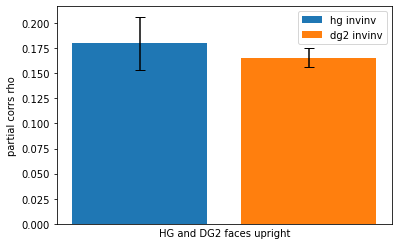

In [264]:


# Sample data
y1 = np.array(sp_pc_hginvinv)  # y values for first array
y2 = np.array(sp_pc_dg2invinv)  # y values for second array

# Calculate mean and standard deviation for each array
mean_y1 = np.mean(y1)
std_y1 = np.std(y1)/ np.sqrt(len(y1))

mean_y2 = np.mean(y2)
std_y2 = np.std(y2)/ np.sqrt(len(y2))

# Plotting
plt.bar(1, mean_y1, yerr=std_y1, label='hg invinv', capsize=5)
plt.bar(2, mean_y2, yerr=std_y2, label='dg2 invinv', capsize=5)

# Adding labels and title
plt.xlabel('HG and DG2 faces upright')
plt.ylabel('partial corrs rho')
#plt.title('Bar Plot of Two Arrays with Error Bars (Mean and Std Deviation)')
plt.xticks([])
plt.legend()

# Display plot
plt.show()


In [228]:
#pareidolia

loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv']

####
#dg2_par_and_par_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04']['dg2'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_dg2_par_and_par_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_dg2_par_and_par_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['dg2']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['dg2']).flatten())[0])
    
    #break


print('1. sp_corr_dg2_par_and_par_inv: ', np.mean(sp_corr_dg2_par_and_par_inv))


####
#dg2_par_and_par_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04']['dg2'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['dg2'].to_numpy()[0])).flatten())[0])



sp_corr_dg2_par_and_par_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_dg2_par_and_par_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['dg2']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('2. sp_corr_dg2_par_and_par_inv_inv: ', np.mean(sp_corr_dg2_par_and_par_inv_inv))


####
#hg_par_and_par_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['hg'].to_numpy()[0].flatten())[0])



sp_corr_hg_par_and_par_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_hg_par_and_par_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['hg']).flatten())[0])
    
    #break


print('3. sp_corr_hg_par_and_par_inv: ', np.mean(sp_corr_hg_par_and_par_inv))


####
#hg_par_and_par_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04']['hg'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['hg'].to_numpy()[0])).flatten())[0])



sp_corr_hg_par_and_par_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_hg_par_and_par_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['hg']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['hg'])).flatten())[0])
    
    #break


print('4. sp_corr_hg_par_and_par_inv_inv: ', np.mean(sp_corr_hg_par_and_par_inv_inv))


####
#hg_par_inv_inv_and_dg2_par_inv_inv


print(spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['hg'].to_numpy()[0])).flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_inv']['dg2'].to_numpy()[0])).flatten())[0])


sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv.append(
            spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['hg'])).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('5. sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv: ', np.mean(sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv))



####
#hg_par_and_dg2_par

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_hg_par_and_dg2_par = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'])):
    sp_corr_hg_par_and_dg2_par.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia'].iloc[i]['dg2']).flatten())[0])
    
    #break



print('6. sp_corr_hg_par_and_dg2_par: ', np.mean(sp_corr_hg_par_and_dg2_par))

0.7636960294780757
1. sp_corr_dg2_par_and_par_inv:  0.6974168445822986
0.9455784267426408
2. sp_corr_dg2_par_and_par_inv_inv:  0.9295937437951678
0.582811116907266
3. sp_corr_hg_par_and_par_inv:  0.5123352250179325
0.8288379422623456
4. sp_corr_hg_par_and_par_inv_inv:  0.7420407430218114
0.7416952244780178
5. sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv:  0.7047588375235664
0.7635020905027174
6. sp_corr_hg_par_and_dg2_par:  0.693216545537563


In [213]:
loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects']


####
#dg2_obj_and_obj_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['dg2'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_dg2_obj_and_obj_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_dg2_obj_and_obj_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['dg2']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['dg2']).flatten())[0])
    
    #break

print('1. sp_corr_dg2_obj_and_obj_inv: ', np.mean(sp_corr_dg2_obj_and_obj_inv))


####
#dg2_obj_and_obj_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['dg2'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['dg2'].to_numpy()[0])).flatten())[0])



sp_corr_dg2_obj_and_obj_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_dg2_obj_and_obj_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['dg2']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('2. sp_corr_dg2_obj_and_obj_inv_inv: ', np.mean(sp_corr_dg2_obj_and_obj_inv_inv))



#hg_obj_and_obj_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['hg'].to_numpy()[0].flatten())[0])




####
#hg_obj_and_obj_inv


sp_corr_hg_obj_and_obj_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_hg_obj_and_obj_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['hg']).flatten())[0])
    
    #break



print('3. sp_corr_hg_obj_and_obj_inv: ', np.mean(sp_corr_hg_obj_and_obj_inv))


####
#hg_obj_and_obj_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['hg'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['hg'].to_numpy()[0])).flatten())[0])


sp_corr_hg_obj_and_obj_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_hg_obj_and_obj_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['hg']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['hg'])).flatten())[0])
    
    #break


print('4. sp_corr_hg_obj_and_obj_inv_inv: ', np.mean(sp_corr_hg_obj_and_obj_inv_inv))


####
#hg_obj_inv_inv_and_dg2_obj_inv_inv


print(spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['hg'].to_numpy()[0])).flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match_inv']['dg2'].to_numpy()[0])).flatten())[0])


sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv.append(
            spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['hg'])).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('5. sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv: ', np.mean(sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv))


####
#hg_obj_and_dg2_obj

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == '04_match']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_hg_obj_and_dg2_obj = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'])):
    sp_corr_hg_obj_and_dg2_obj.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'objects'].iloc[i]['dg2']).flatten())[0])
    
    #break


print('6. sp_corr_hg_obj_and_dg2_obj: ', np.mean(sp_corr_hg_obj_and_dg2_obj))



0.8412545657535644
1. sp_corr_dg2_obj_and_obj_inv:  0.7149331452858081
0.939971891385219
2. sp_corr_dg2_obj_and_obj_inv_inv:  0.9343630124783298
0.3814826472452831
3. sp_corr_hg_obj_and_obj_inv:  0.49015696410982557
0.7363035130720573
4. sp_corr_hg_obj_and_obj_inv_inv:  0.7165094159923406
0.7868139104840336
5. sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv:  0.7074477491601381
0.699539237046813
6. sp_corr_hg_obj_and_dg2_obj:  0.6968771828501138


In [216]:
loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv']

stim_folder        stim_name  \
192  pareidolia_art_inv  par_gaze_01_inv   
193  pareidolia_art_inv  par_gaze_02_inv   
194  pareidolia_art_inv  par_gaze_03_inv   
195  pareidolia_art_inv  par_gaze_04_inv   
196  pareidolia_art_inv  par_gaze_05_inv   
197  pareidolia_art_inv  par_gaze_06_inv   
198  pareidolia_art_inv  par_gaze_07_inv   
199  pareidolia_art_inv  par_gaze_08_inv   
200  pareidolia_art_inv  par_gaze_09_inv   
201  pareidolia_art_inv  par_gaze_10_inv   
202  pareidolia_art_inv  par_gaze_11_inv   
203  pareidolia_art_inv  par_gaze_12_inv   
204  pareidolia_art_inv  par_gaze_13_inv   
205  pareidolia_art_inv  par_gaze_14_inv   
206  pareidolia_art_inv  par_gaze_15_inv   
207  pareidolia_art_inv  par_gaze_16_inv   
208  pareidolia_art_inv  par_gaze_17_inv   
209  pareidolia_art_inv  par_gaze_18_inv   
210  pareidolia_art_inv  par_gaze_19_inv   
211  pareidolia_art_inv  par_gaze_20_inv   
212  pareidolia_art_inv  par_gaze_21_inv   
213  pareidolia_art_inv  par_gaze_22_inv   
214  pareidolia_art_inv  par_gaze_23_inv   
215  pareidolia_art_inv  par_gaze_24_inv   
216  pareidolia_art_inv  par_gaze_25_inv   
217  pareidolia_art_inv  par_gaze_26_inv   
218  pareidolia_art_inv  par_gaze_27_inv   
219  pareidolia_art_inv  par_gaze_28_inv   
220  pareidolia_art_inv  par_gaze_29_inv   
221  pareidolia_art_inv  par_gaze_30_inv   
222  pareidolia_art_inv  par_gaze_31_inv   
223  pareidolia_art_inv  par_gaze_32_inv   

                                                    hg  \
192  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
193  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
194  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
195  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
196  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
197  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
198  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
199  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
200  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
201  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
202  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
203  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
204  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
205  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
206  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
207  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
208  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
209  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
210  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
211  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
212  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
213  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
214  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
215  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
216  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
217  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
218  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
219  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
220  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
221  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
222  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
223  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  
192  [[-18.302300826718575, -18.302300826718575, -1...  
193  [[-18.37589334575482, -18.37589334575482, -18....  
194  [[-18.496778133430396, -18.496778133430396, -1...  
195  [[-18.60241424151377, -18.60241424151377, -18....  
196  [[-18.29694626711732, -18.29694626711732, -18....  
197  [[-19.10143934365796, -19.10143934365796, -19....  
198  [[-18.279331731196674, -18.279331731196674, -1...  
199  [[-17.89642302378649, -17.89642302378649, -17....  
200  [[-18.147003897331178, -18.147003897331178, -1...  
201  [[-19.03680264783764, -19.03680264783764, -19....  
202  [[-17.704779

In [217]:
#pareidolia_art

loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art']

####
#dg2_par_art_and_par_art_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['dg2'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_dg2_par_art_and_par_art_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_dg2_par_art_and_par_art_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['dg2']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['dg2']).flatten())[0])
    
    #break


print('1. sp_corr_dg2_par_art_and_par_art_inv: ', np.mean(sp_corr_dg2_par_art_and_par_art_inv))


####
#dg2_par_art_and_par_art_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['dg2'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['dg2'].to_numpy()[0])).flatten())[0])



sp_corr_dg2_par_art_and_par_art_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_dg2_par_art_and_par_art_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['dg2']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('2. sp_corr_dg2_par_art_and_par_art_inv_inv: ', np.mean(sp_corr_dg2_par_art_and_par_art_inv_inv))


####
#hg_par_art_and_par_art_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['hg'].to_numpy()[0].flatten())[0])



sp_corr_hg_par_art_and_par_art_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_hg_par_art_and_par_art_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['hg']).flatten())[0])
    
    #break


print('3. sp_corr_hg_par_art_and_par_art_inv: ', np.mean(sp_corr_hg_par_art_and_par_art_inv))


####
#hg_par_art_and_par_art_inv_inv

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['hg'].to_numpy()[0].flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['hg'].to_numpy()[0])).flatten())[0])



sp_corr_hg_par_art_and_par_art_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_hg_par_art_and_par_art_inv_inv.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['hg']).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['hg'])).flatten())[0])
    
    #break


print('4. sp_corr_hg_par_art_and_par_art_inv_inv: ', np.mean(sp_corr_hg_par_art_and_par_art_inv_inv))


####
#hg_par_art_inv_inv_and_dg2_par_art_inv_inv


print(spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['hg'].to_numpy()[0])).flatten(), 
          np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01_inv']['dg2'].to_numpy()[0])).flatten())[0])


sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv.append(
            spearmanr(np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['hg'])).flatten(), 
                      np.array(rotate_180(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art_inv'].iloc[i]['dg2'])).flatten())[0])
    
    #break


print('5. sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv: ', np.mean(sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv))



####
#hg_par_art_and_dg2_par_art

print(spearmanr(loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['hg'].to_numpy()[0].flatten(), 
          loaded_df_csv[loaded_df_csv['stim_name'] == 'par_gaze_01']['dg2'].to_numpy()[0].flatten())[0])


sp_corr_hg_par_art_and_dg2_par_art = []
for i in range(len(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'])):
    sp_corr_hg_par_art_and_dg2_par_art.append(
            spearmanr(np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['hg']).flatten(), 
                      np.array(loaded_df_csv[loaded_df_csv['stim_folder'] == 'pareidolia_art'].iloc[i]['dg2']).flatten())[0])
    
    #break



print('6. sp_corr_hg_par_art_and_dg2_par_art: ', np.mean(sp_corr_hg_par_art_and_dg2_par_art))

0.6511730129304933
1. sp_corr_dg2_par_art_and_par_art_inv:  0.7804680471789613
0.95987011323264
2. sp_corr_dg2_par_art_and_par_art_inv_inv:  0.9436671658032658
0.300804389324272
3. sp_corr_hg_par_art_and_par_art_inv:  0.4933945399585421
0.5890596716490965
4. sp_corr_hg_par_art_and_par_art_inv_inv:  0.6869546396747661
0.6504673971187132
5. sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv:  0.7108625180661701
0.6598860338668044
6. sp_corr_hg_par_art_and_dg2_par_art:  0.6911152394142075


<Figure size 2160x1728 with 0 Axes>

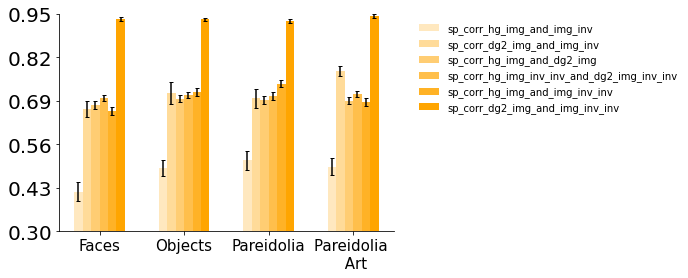

In [232]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 24))

# Example data (replace these arrays with your own)
data_1 = [
    np.array(sp_corr_hg_face_and_face_inv),  # Group 1 data
    np.array(sp_corr_hg_obj_and_obj_inv),  # Group 2 data
    np.array(sp_corr_hg_par_and_par_inv),  # Group 3 data
    np.array(sp_corr_hg_par_art_and_par_art_inv),  # Group 4 data
]


# Example additional data (replace these arrays with your own)
data_2 = [
    np.array(sp_corr_dg2_face_and_face_inv),  # Group 1 data
    np.array(sp_corr_dg2_obj_and_obj_inv),  # Group 2 data
    np.array(sp_corr_dg2_par_and_par_inv),  # Group 3 data
    np.array(sp_corr_dg2_par_art_and_par_art_inv)   # Group 4 data
]




# Example additional data (replace these arrays with your own)
data_3 = [
    np.array(sp_corr_hg_face_and_dg2_face),  # Group 1 data
    np.array(sp_corr_hg_obj_and_dg2_obj),  # Group 2 data
    np.array(sp_corr_hg_par_and_dg2_par),  # Group 3 data
    np.array(sp_corr_hg_par_art_and_dg2_par_art),   # Group 4 data
]

# Example additional data (replace these arrays with your own)

data_4 = [
    np.array(sp_corr_hg_face_inv_inv_and_dg2_face_inv_inv),  # Group 1 data
    np.array(sp_corr_hg_obj_inv_inv_and_dg2_obj_inv_inv),  # Group 2 data
    np.array(sp_corr_hg_par_inv_inv_and_dg2_par_inv_inv),  # Group 3 data
    np.array(sp_corr_hg_par_art_inv_inv_and_dg2_par_art_inv_inv),   # Group 4 data
]


# Example additional data (replace these arrays with your own)
data_5 = [
    np.array(sp_corr_hg_face_and_face_inv_inv),  # Group 1 data
    np.array(sp_corr_hg_obj_and_obj_inv_inv),  # Group 2 data
    np.array(sp_corr_hg_par_and_par_inv_inv),  # Group 3 data
    np.array(sp_corr_hg_par_art_and_par_art_inv_inv),   # Group 4 data
]


# Example additional data (replace these arrays with your own)
data_6 = [
    np.array(sp_corr_dg2_face_and_face_inv_inv),  # Group 1 data
    np.array(sp_corr_dg2_obj_and_obj_inv_inv),  # Group 2 data
    np.array(sp_corr_dg2_par_and_par_inv_inv),  # Group 3 data
    np.array(sp_corr_dg2_par_art_and_par_art_inv_inv)   # Group 4 data
]


# Combine the data arrays
all_data = [data_1, data_2, data_3, data_4, data_5, data_6]

# Calculate means and standard deviations for each set of data
means = [[np.mean(group) for group in dataset] for dataset in all_data]
std_devs = [[np.std(group) / np.sqrt(len(group)) for group in dataset] for dataset in all_data]

# Bar chart with error bars using one standard deviation
fig, ax = plt.subplots()
bar_width = 0.8  # Width of the bars
bar_positions = np.arange(len(means[0]))*8  # Positions for the bars

# Plot the first set of data
bars1 = ax.bar(bar_positions - bar_width*2.5, means[0], yerr=std_devs[0], capsize=2, label='sp_corr_hg_img_and_img_inv', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.25)

# Plot the second set of data
bars2 = ax.bar(bar_positions - bar_width*1.5, means[1], yerr=std_devs[1], capsize=2, label='sp_corr_dg2_img_and_img_inv', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.4)


# Plot the second set of data
bars3 = ax.bar(bar_positions - bar_width/2, means[2], yerr=std_devs[2], capsize=2, label='sp_corr_hg_img_and_dg2_img', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.55)

# Plot the second set of data
bars4 = ax.bar(bar_positions + bar_width/2, means[3], yerr=std_devs[3], capsize=2, label='sp_corr_hg_img_inv_inv_and_dg2_img_inv_inv', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.7)


# Plot the second set of data
bars5 = ax.bar(bar_positions + bar_width*1.5, means[4], yerr=std_devs[4], capsize=2, label='sp_corr_hg_img_and_img_inv_inv', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.85)

# Plot the second set of data
bars6 = ax.bar(bar_positions + bar_width*2.5, means[5], yerr=std_devs[5], capsize=2, label='sp_corr_dg2_img_and_img_inv_inv', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=1.0)


# Adding x-axis labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Faces', 'Objects', 'Pareidolia', 'Pareidolia \n Art'], fontsize=15)

# Increase y-axis label font size
ax.yaxis.label.set_size(20)

# Increase y-axis tick label font size
ax.yaxis.set_tick_params(labelsize=20)

# Adding a legend
#ax.legend(fontsize=20)

# Set y-axis limits from 0 to 1
ax.set_ylim(0.3, .95)
ax.set_yticks(np.linspace(0.3, .95, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('')
ax.set_xlabel('')

# Get the current axes
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font size for tick labels
#ax.tick_params(axis='both', labelsize=12)

# Move the legend outside of the plot frame
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)


#plt.savefig('inv_inv_effect.png', dpi= 600, bbox_inches='tight')


# Show the plot
plt.show()




